# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import datetime
from datetime import datetime
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = f'{url}appid={weather_api_key}&units={units}&q='
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=7249ab54d735939008c0fbb83c7df83d&units=imperial&q=


In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#print(cities)
#Loop through the cities in the city list 
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(record) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                
            city_name.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...') 
        record = record + 1


Beginning Data Retrieval
-------------------------------
Processing Record 1 of 582 | jalu
Processing Record 2 of 582 | santa cruz de la palma
Processing Record 3 of 582 | roblin
Processing Record 4 of 582 | khatanga
Processing Record 5 of 582 | saskylakh
Processing Record 6 of 582 | san pedro
Processing Record 7 of 582 | mahebourg
Processing Record 8 of 582 | taoudenni
Processing Record 9 of 582 | albany
Processing Record 10 of 582 | avarua
Processing Record 11 of 582 | sao filipe
Processing Record 12 of 582 | busselton
Processing Record 13 of 582 | jalingo
Processing Record 14 of 582 | harpanahalli
Processing Record 15 of 582 | chokurdakh
Processing Record 16 of 582 | izhmorskiy
Processing Record 17 of 582 | hermanus
Processing Record 18 of 582 | saint-joseph
Processing Record 19 of 582 | illoqqortoormiut
illoqqortoormiut city not found. Skipping...
Processing Record 20 of 582 | kruisfontein
Processing Record 21 of 582 | bredasdorp
Processing Record 22 of 582 | fukue
Processing Recor

Processing Record 190 of 582 | banepa
Processing Record 191 of 582 | dunedin
Processing Record 192 of 582 | bad hofgastein
Processing Record 193 of 582 | kant
Processing Record 194 of 582 | cabo san lucas
Processing Record 195 of 582 | new norfolk
Processing Record 196 of 582 | henties bay
Processing Record 197 of 582 | ribeira grande
Processing Record 198 of 582 | bagdarin
Processing Record 199 of 582 | oytal
Processing Record 200 of 582 | trelew
Processing Record 201 of 582 | manoel urbano
Processing Record 202 of 582 | vannes
Processing Record 203 of 582 | viligili
viligili city not found. Skipping...
Processing Record 204 of 582 | vilcun
Processing Record 205 of 582 | saint-philippe
Processing Record 206 of 582 | klaksvik
Processing Record 207 of 582 | ancud
Processing Record 208 of 582 | puerto del rosario
Processing Record 209 of 582 | lodja
Processing Record 210 of 582 | rusape
Processing Record 211 of 582 | tabou
Processing Record 212 of 582 | tura
Processing Record 213 of 582 

Processing Record 382 of 582 | dzaoudzi
Processing Record 383 of 582 | progreso
Processing Record 384 of 582 | porto belo
Processing Record 385 of 582 | skjervoy
Processing Record 386 of 582 | fort morgan
Processing Record 387 of 582 | tubruq
tubruq city not found. Skipping...
Processing Record 388 of 582 | sciacca
Processing Record 389 of 582 | ust-kuyga
Processing Record 390 of 582 | kirakira
Processing Record 391 of 582 | tiksi
Processing Record 392 of 582 | hunza
hunza city not found. Skipping...
Processing Record 393 of 582 | moerai
Processing Record 394 of 582 | ahuimanu
Processing Record 395 of 582 | kavaratti
Processing Record 396 of 582 | palabuhanratu
palabuhanratu city not found. Skipping...
Processing Record 397 of 582 | kuantan
Processing Record 398 of 582 | isla vista
Processing Record 399 of 582 | conde
Processing Record 400 of 582 | grand-santi
Processing Record 401 of 582 | misratah
Processing Record 402 of 582 | tessalit
Processing Record 403 of 582 | batemans bay
Pro

Processing Record 570 of 582 | neiafu
Processing Record 571 of 582 | wanganui
Processing Record 572 of 582 | sfantu gheorghe
Processing Record 573 of 582 | wilmington
Processing Record 574 of 582 | codrington
Processing Record 575 of 582 | suntar
Processing Record 576 of 582 | longyan
Processing Record 577 of 582 | shache
Processing Record 578 of 582 | chippewa falls
Processing Record 579 of 582 | portland
Processing Record 580 of 582 | cua
Processing Record 581 of 582 | kristiansund
Processing Record 582 of 582 | port hawkesbury


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create and Display DataFrame a data frame from api call list:
weather_dictionary = {
    "City": city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date   
    
}

weather_data = pd.DataFrame(weather_dictionary)

#Display the DataFrame 
weather_data.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv("output_data/cities.csv")

# Display data frame head 
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.03,21.55,83.30,31,0,10.33,LY,1600221349
1,Santa Cruz de La Palma,28.68,-17.76,75.00,88,100,13.87,ES,1600221350
2,Roblin,51.23,-101.36,51.08,72,100,11.50,CA,1600221350
3,Khatanga,71.97,102.50,51.69,76,100,6.76,RU,1600221350
4,Saskylakh,71.92,114.08,51.10,67,100,5.41,RU,1600221350


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,20.004756,24.364831,65.370188,73.152256,52.625940,7.747312,1.600221e+09
std,33.826835,89.505530,14.711437,19.172164,39.450285,5.556385,5.698116e+01
min,-54.800000,-179.170000,19.420000,7.000000,0.000000,0.220000,1.600221e+09
25%,-8.840000,-53.547500,53.600000,63.000000,7.750000,3.442500,1.600221e+09
50%,24.960000,29.200000,66.990000,77.000000,58.000000,6.585000,1.600221e+09
75%,48.025000,102.500000,77.000000,88.000000,91.250000,10.765000,1.600221e+09
max,78.220000,179.320000,98.690000,100.000000,100.000000,34.000000,1.600221e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data.index

RangeIndex(start=0, stop=532, step=1)

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [27]:
weather_data_df = weather_data.dropna(thresh = 3)
weather_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.03,21.55,83.30,31,0,10.33,LY,1600221349
1,Santa Cruz de La Palma,28.68,-17.76,75.00,88,100,13.87,ES,1600221350
2,Roblin,51.23,-101.36,51.08,72,100,11.50,CA,1600221350
3,Khatanga,71.97,102.50,51.69,76,100,6.76,RU,1600221350
4,Saskylakh,71.92,114.08,51.10,67,100,5.41,RU,1600221350
...,...,...,...,...,...,...,...,...,...
527,Chippewa Falls,44.94,-91.39,69.80,68,1,4.70,US,1600221001
528,Portland,45.52,-122.68,73.00,64,90,3.56,US,1600220974
529,Cua,10.16,-66.89,82.40,74,20,3.36,VE,1600221412
530,Kristiansund,63.11,7.73,44.60,87,100,31.09,NO,1600221365


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

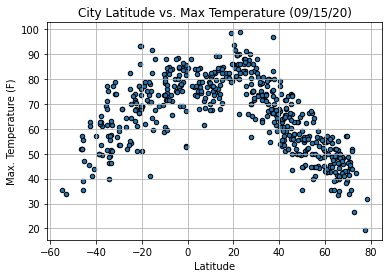

In [28]:
# Build a scatter plot for each data type
#plt.figure(figsize=(9,5))
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s = [20], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature ' + '(' + datetime.today().strftime('%m/%d/%y') + ')')
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()


## Latitude vs. Humidity Plot

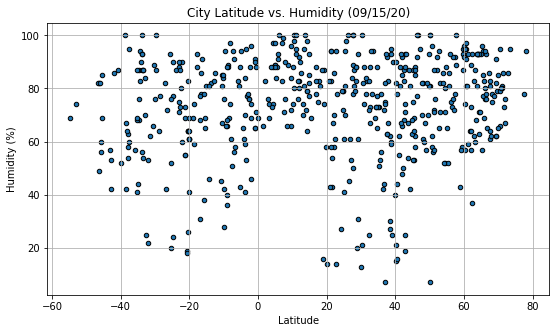

In [29]:
# Build a scatter plot for each data type
plt.figure(figsize=(9,5))
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s = [20], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity ' + '(' + datetime.today().strftime('%m/%d/%y') + ')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

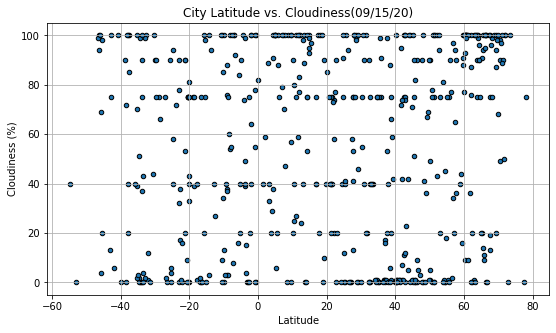

In [30]:
# Build a scatter plot for each data type
plt.figure(figsize=(9,5))
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s = [20], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness' + '(' + datetime.today().strftime('%m/%d/%y') + ')')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

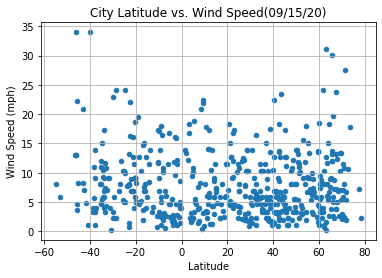

In [31]:
 #Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=20)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed' + '(' + datetime.today().strftime('%m/%d/%y') + ')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots

# Create Northern and Southern Hemisphere DataFrames# Create new data frame for northern hemisphere (lat >= 0 degree):
weather_data_north = weather_data[weather_data['Lat'] >= 0]

#weather_data_north.count()

# Create new data frame for southern hemisphere (lat < 0 degree):
weather_data_south = weather_data[weather_data['Lat'] < 0]

#weather_data_south.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7055779823688837


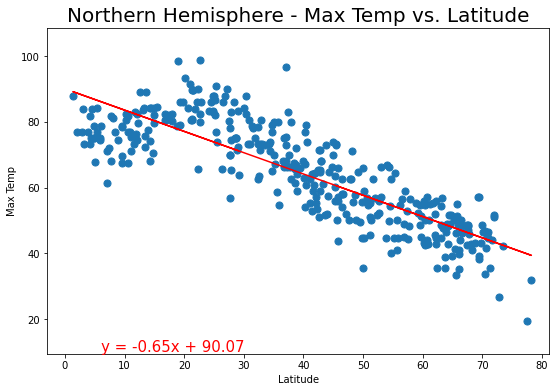

In [33]:
# Build scatter plot for each data type:
plt.figure(figsize = (9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker = 'o', s=[50])
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(line_eq,(6, 10),fontsize=15,color="red")



# limits of the y axis:
plt.ylim(min(weather_data['Max Temp'])-10, max(weather_data['Max Temp'])+10)

#limits of the x axis:
plt.xlim(-3, max(weather_data['Lat'])+3)

# Print r-squared value:
print(f'The r-squared is: {rvalue**2}')

# Save the figure:
plt.savefig('Images/Northern Hemisphere - Temperature vs Latitude.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48


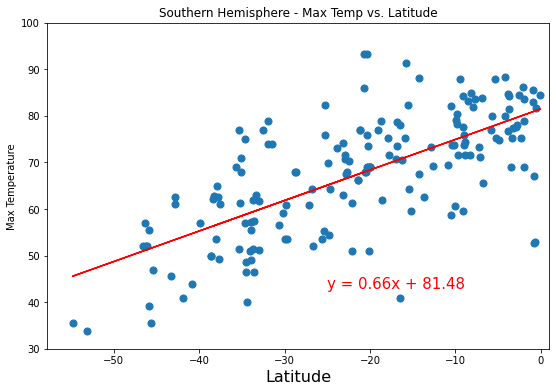

In [34]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[50])
plt.plot(x_values,regress_values, 'red')

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43), fontsize = 15, color = 'red')
#plt.grid(False)

#limits of the y axis:
plt.ylim(30, 100)

#limits of the x axis:
plt.xlim(min(weather_data['Lat'])-3, +1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/Southern Hemisphere - Temperature vs Latitude.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003287


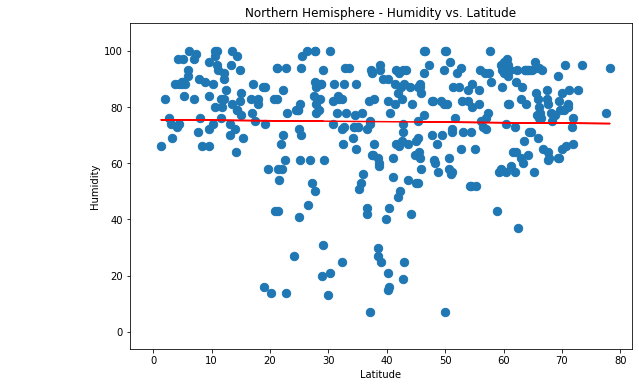

In [35]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70])
plt.plot(x_values,regress_values, 'red')

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq2,(-25,43), fontsize = 15, color = 'red')
#plt.grid(False)

#limits of the y axis:
plt.ylim(-6, 110)

#limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,7)}')

# Save the figure:
plt.savefig('Images/Northern Hemisphere - Humidity vs Latitude.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


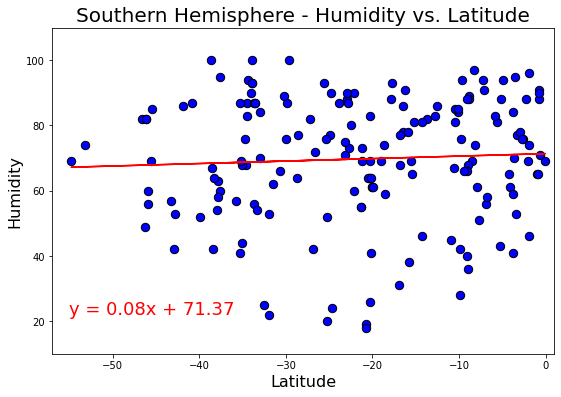

In [36]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red')

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize= 18, color='red')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/Southern Hemisphere Humidity vs Latitude.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009525441


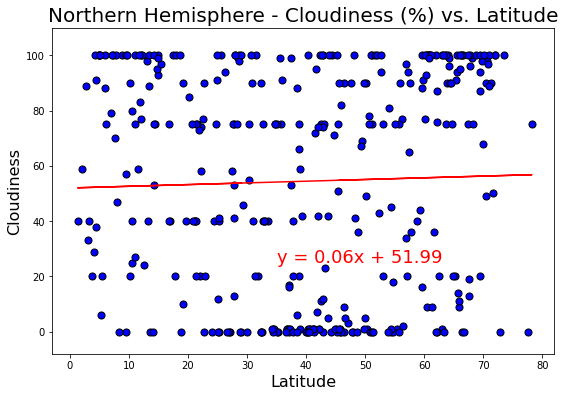

In [37]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[50], edgecolors='black')
plt.plot(x_values,regress_values,'red')

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='red')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,10)}')

# Save the figure:
plt.savefig('Images/Northern Hemisphere Cloudiness vs Latitude.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 5.242679e-06


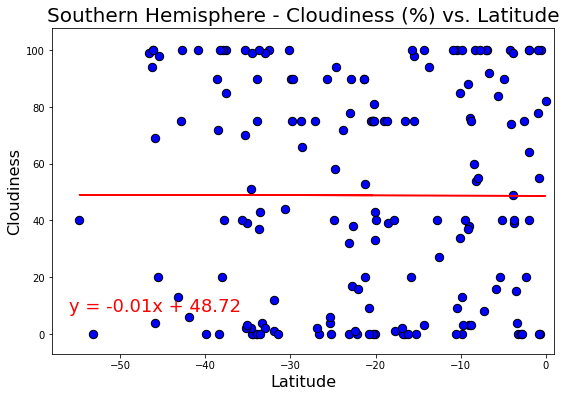

In [38]:
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red')

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='red')
#plt.grid(False)

# limits of the y axis:
plt.ylim(-7, 108)

# limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,12)}')

# Save the figure:
plt.savefig('Images/Southern Hemisphere - Cloudiness vs Latitude.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003880395301


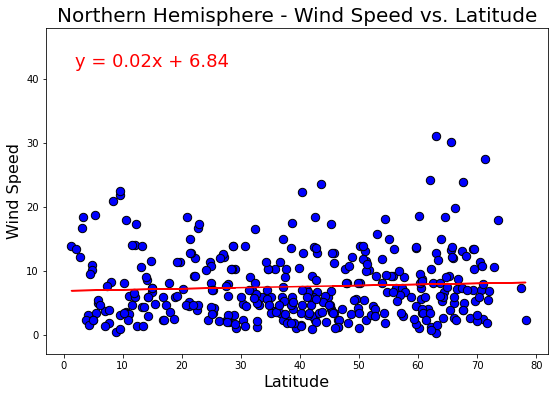

In [39]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red')

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize = 16, color ='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='red')
#plt.grid(False)

# limits of the y axis:
plt.ylim(-3, 48)

# limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,12)}')

# Save the figure:
plt.savefig('Images/Northern Hemisphere - Wind Speed vs. Latitude.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.045278898423


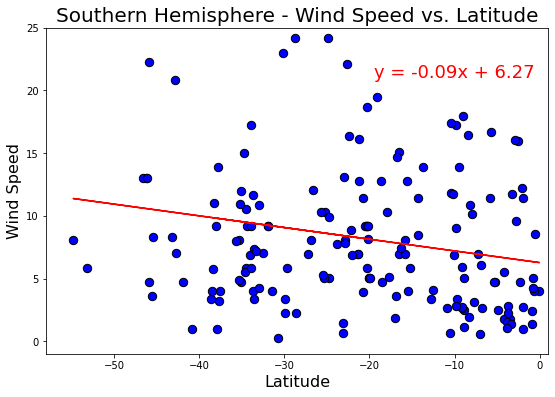

In [40]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red')

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed', fontsize = 16, color='black')
plt.xlabel('Latitude', fontsize = 16, color = 'black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='red')
#plt.grid(False)

# limits of the y axis:
plt.ylim(-1, 25)

# limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,12)}')

# Save the figure:
plt.savefig('Images/Southern Hemisphere - Wind Speed vs. Latitude.png')

# Show plot:
plt.show()